In [1]:
%load_ext autoreload
%autoreload 2                                                                                                                           

In [2]:
import os
import sys
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sys.path.insert(0, '../')

In [4]:
RR="BHB"
DATADIR="/datascope/subaru/user/swei20/data/pfsspec"
RBF_PATH =  os.path.join(DATADIR, f"import/stellar/rbf/bosz_5000_{RR}/rbf/", 'spectra.h5')     

In [5]:
RBF_PATH

'/datascope/subaru/user/swei20/data/pfsspec/import/stellar/rbf/bosz_5000_BHB/rbf/spectra.h5'

In [80]:
from lv.fisher.fisher_pc import PC

In [102]:
p = PC()

Fe_H (5,) [-2.5  -2.25 -2.   -1.75 -1.5 ]
T_eff (12,) [6750. 7000. 7250. 7500. 7750. 8000. 8250. 8500. 8750. 9000. 9250. 9500.]
log_g (4,) [2.  2.5 3.  3.5]
C_M (6,) [-0.75 -0.5  -0.25  0.    0.25  0.5 ]
O_M (4,) [-0.25  0.    0.25  0.5 ]
#4447 R=10000.02


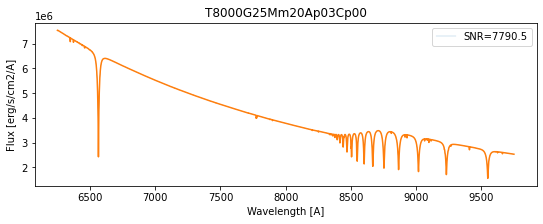

In [103]:
obsflux, obsvar = p.test_makeObs()

In [95]:
temp_pmt=p.test["pmt"]

Fitting with Template T8000G25Mm20Ap03Cp00


/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/scipy/optimize/_minimize.py:535: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


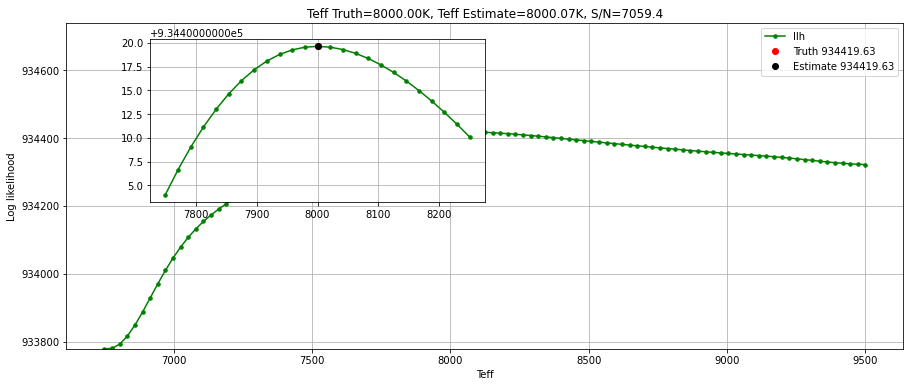

In [110]:
T0 = p.test_eval_pmt_on_axis(test_X=8000)

Fitting with Template T10000G25Mm20Ap03Cp00


/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/scipy/optimize/_minimize.py:535: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


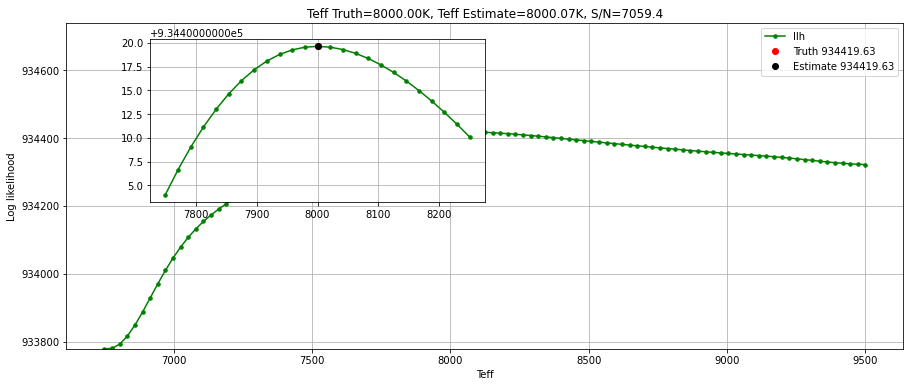

In [112]:
T0 = p.test_eval_pmt_on_axis(test_X=10000)

/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/scipy/optimize/_minimize.py:535: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


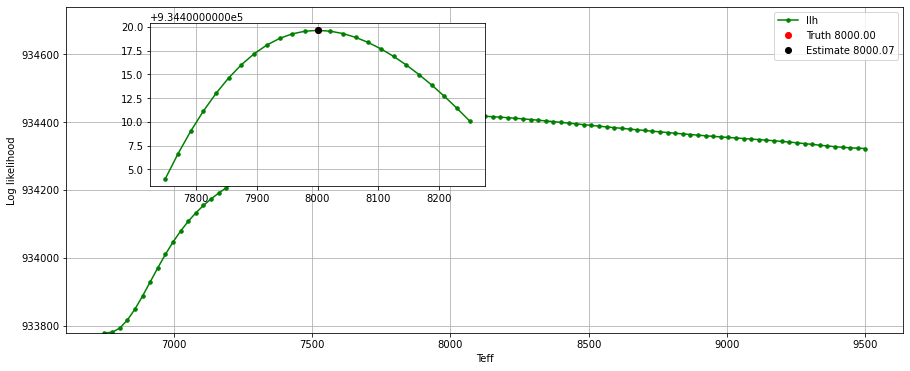

In [104]:
T0 = p.test_eval_pmt_on_axis()

/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/scipy/optimize/_minimize.py:535: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


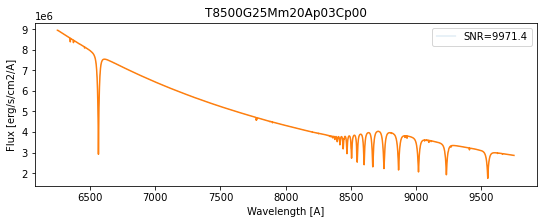

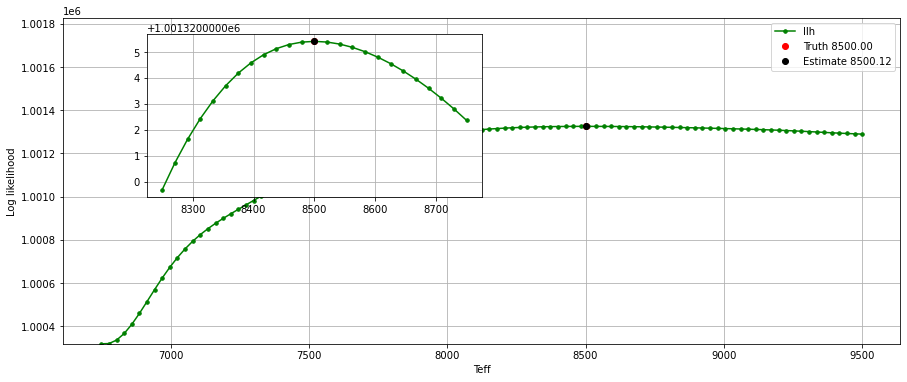

In [98]:
T0 = p.test_eval_pmt_on_axis(test_X=8500)

In [90]:
T0

8500.120759010315

In [77]:
obsflux[:2]

array([5308545.8569664 , 5307440.77009202])

In [12]:
obsvar.shape

(2204,)

In [15]:
(obsflux * obsflux).shape

(2204,)

In [6]:
from lv.grid.bosz import Bosz
from lv.grid.rbfgrid import RbfGrid
from lv.grid.modelgrid import ModelGrid

In [7]:
rbf = ModelGrid(Bosz(pca=True, normalized=True), RbfGrid)

In [9]:
rbf.preload_arrays = False
rbf.load(fn, format='h5')

In [31]:
for k in axes:
    print(k, axes[k].values.shape, axes[k].values)

Fe_H (5,) [-2.5  -2.25 -2.   -1.75 -1.5 ]
T_eff (12,) [6750. 7000. 7250. 7500. 7750. 8000. 8250. 8500. 8750. 9000. 9250. 9500.]
log_g (4,) [2.  2.5 3.  3.5]
C_M (6,) [-0.75 -0.5  -0.25  0.    0.25  0.5 ]
O_M (4,) [-0.25  0.    0.25  0.5 ]


In [32]:
p=[-2.0, 8000,2.5,0.0,0.25]
pc= rbf.grid.grid.get_value('flux', Fe_H=p[0], T_eff=p[1], log_g=p[2],C_M=p[3], O_M=p[4])

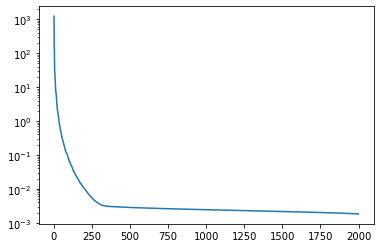

In [38]:
plt.plot(rbf.grid.eigs["flux"])
plt.yscale("log")

In [33]:
pc

array([ 1.76290552e+01, -6.18327119e-01,  7.80414164e-02, ...,
        2.03944828e-05,  6.10955452e-06, -1.91569243e-05])

In [74]:
from lv.fisher.fisher import Fisher
f5k=Fisher()
f5k.init()

https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.00/amm20cp00op00t8000g25v20modrt0b50000rs.asc.bz2
#8893 R=20000.03


In [75]:
f5k.sky0.shape

(2511, 2)

In [59]:
spec = f5k.getSpectrum(-2.0, 8000, 2.5, R=5000, lb=3000, ub=14000)

https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_005000/metal_-2.00/carbon_+0.00/alpha_+0.00/amm20cp00op00t8000g25v20modrt0b5000rs.asc.bz2


In [61]:
p=[-2.0, 8000,2.5,0.0,0.0]
a = rbf.get_model(denormalize=True, Fe_H=p[0], T_eff=p[1], log_g=p[2],C_M=p[3], O_M=p[4])

In [77]:
wave=a.wave
step=0
wave0 = f5k.Util.resampleWave(wave, step)

#15404 R=10000.02


In [84]:
rbf = p.RBF.rbf

In [86]:
rbf.continuum_model.denormalize(

In [64]:
p.eigv.shape

(2204, 2000)

In [ ]:
var_m = Util.getVar(flux_m, sky_m)


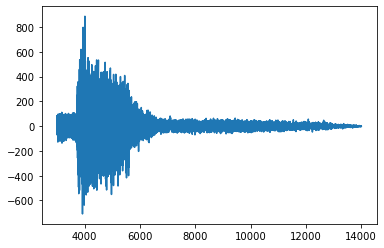

In [65]:
plt.plot(a.wave, a.flux-spec[:,1])

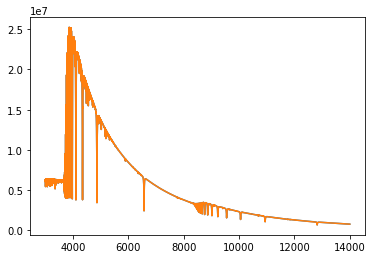

In [56]:
plt.plot(a.wave, a.flux)
plt.plot(a.wave, spec[:,1])

In [18]:
pc

array([ 1.76290552e+01, -6.18327119e-01,  7.80414164e-02, ...,
        2.03944828e-05,  6.10955452e-06, -1.91569243e-05])

In [14]:
pmt=[-2.0,8000,2.5,0.0,0.25]

In [16]:
rbf.get_model(*pmt)

TypeError: get_model() takes from 1 to 2 positional arguments but 6 were given

In [26]:
from lv.grid.pcagrid import PcaGrid

In [29]:
from lv.grid.arraygrid import ArrayGrid

In [30]:
pca = PcaGrid(ArrayGrid)

In [32]:
pca.load('/datascope/subaru/user/swei20/data/pfsspec/import/stellar/rbf/bosz_5000_BHB/rbf/spectra.h5', format="h5")

TypeError: load_items() missing 1 required positional argument: 'self'

In [4]:
from lv.fisher.fisher import Fisher

In [9]:
f=Fisher(W="RL")
f.init()

https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t8000g25v20modrt0b50000rs.asc.bz2
#222 R=500.00


In [10]:
plt.plot(f.wave, f.spec)

AttributeError: 'Fisher' object has no attribute 'spec'

In [6]:
pmt = [-2.0,8000,2.5,0.0,0.25]
f.testTemplate(pmt)

https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t8000g25v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t8000g20v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t8000g30v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t7750g25v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t7750g20v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t7750g30v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/al